In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv("./Datasets/logistic/train.csv")
dataset

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427


In [3]:
dataset.describe()

,distance,weight,cost
count,38999.000000,38999.000000,38999.000000
mean,2004.061643,42.293033,80.972210
std,728.996843,75.473752,180.715055
min,400.000000,1.000000,5.000000
25%,1400.000000,13.000000,38.768742
50%,2000.000000,25.000000,46.468476
75%,2600.000000,39.000000,70.239797
max,3600.000000,500.000000,2019.734797


In [5]:
dataset.columns

Index(['trip', 'date', 'dayPart', 'exWeatherTag', 'originLocation',
       'destinationLocation', 'distance', 'type', 'weight', 'packageType',
       'carrier', 'cost'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = dataset.drop('cost',axis=1)
y = dataset['cost']

Train_x, Test_x, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=42)
Train_x.shape, Test_x.shape

((29249, 11), (9750, 11))

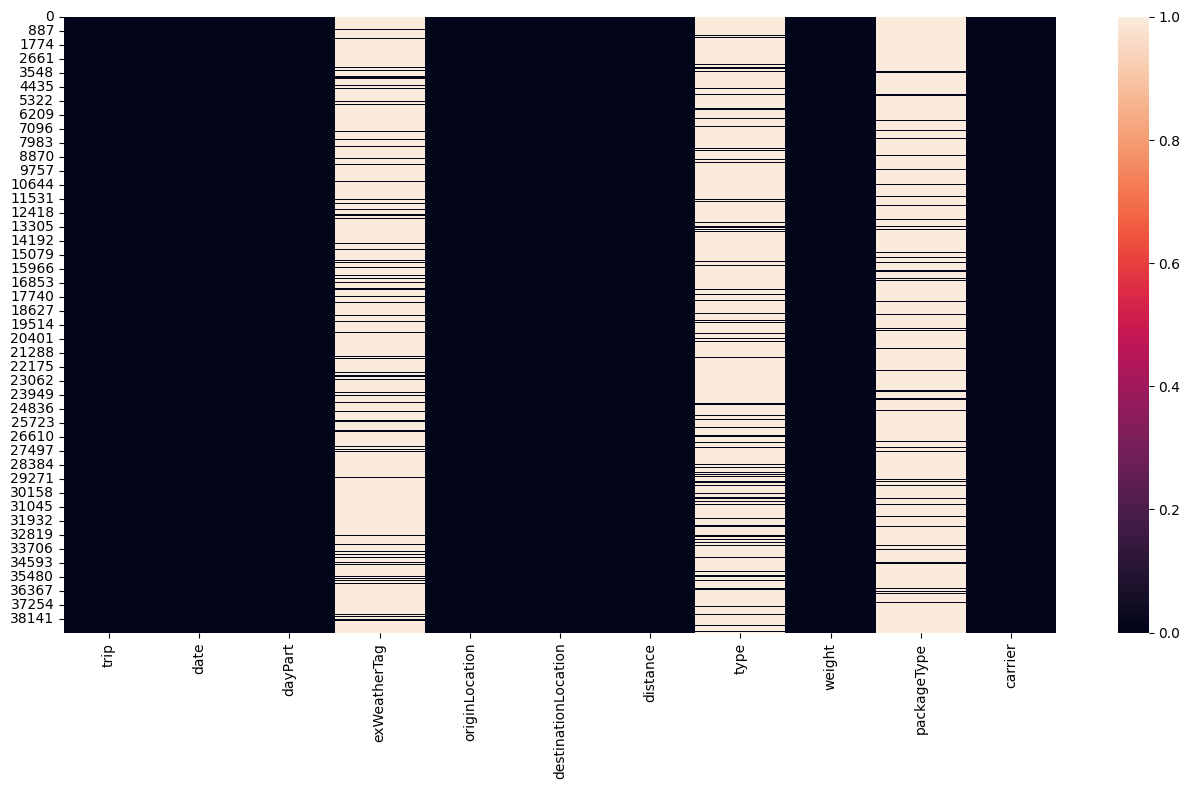

In [8]:
plt.figure(figsize=(16,8))
sb.heatmap(X.isnull())
plt.show()

<AxesSubplot: xlabel='dayPart', ylabel='count'>

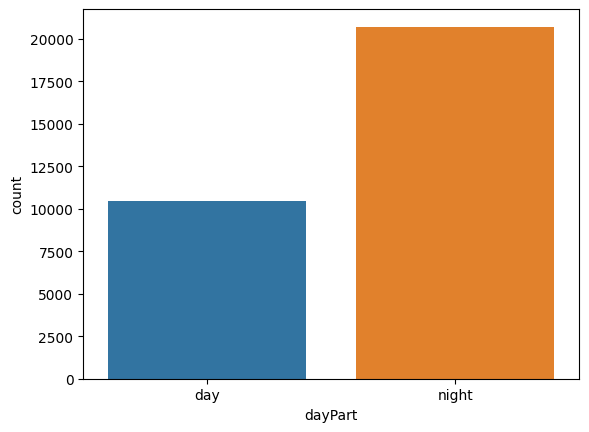

In [9]:
sb.countplot(x=train_x['dayPart'])
# train_x['trip'].unique().shape

<AxesSubplot: xlabel='originLocation', ylabel='count'>

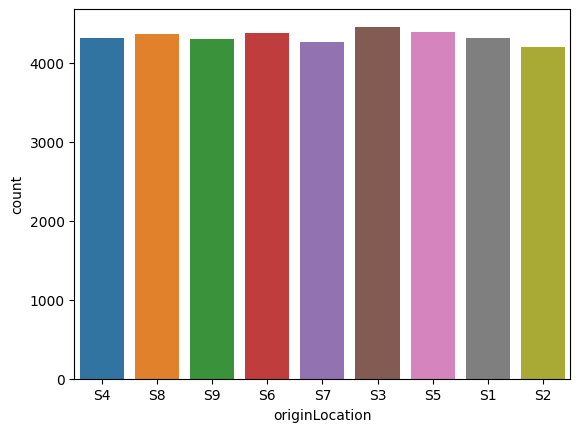

In [19]:
sb.countplot(x=X['originLocation'])

<AxesSubplot: xlabel='destinationLocation', ylabel='count'>

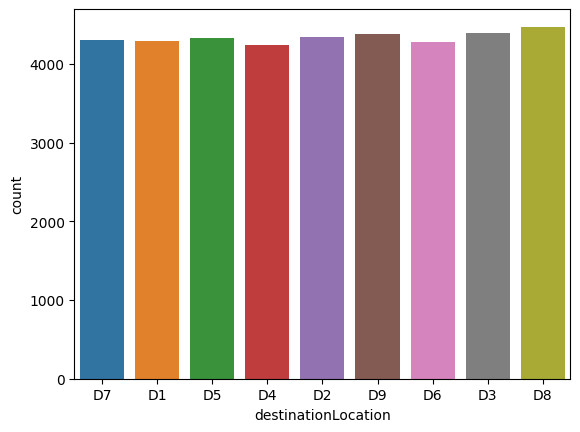

In [20]:
sb.countplot(x=X['destinationLocation'])

<AxesSubplot: xlabel='carrier', ylabel='count'>

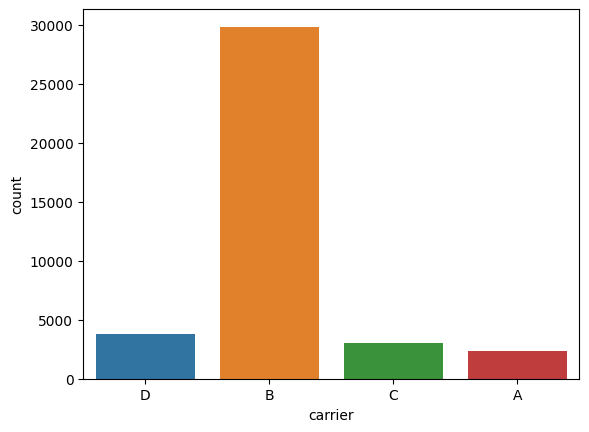

In [31]:
sb.countplot(x=X['carrier'])

C:\Users\jeetc\AppData\Local\Temp\ipykernel_39824\2019339825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataset.corr(),annot=True,fmt=".2f")


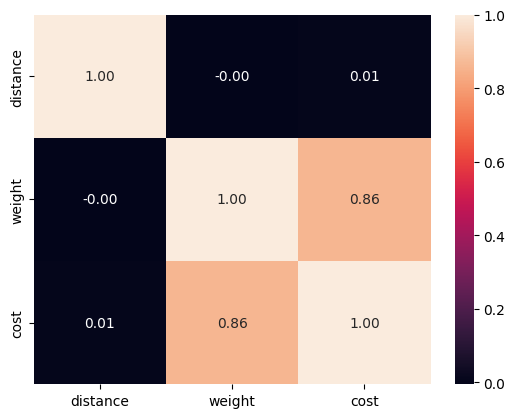

In [30]:
sb.heatmap(dataset.corr(),annot=True,fmt=".2f")
plt.show()

<AxesSubplot: xlabel='weight', ylabel='cost'>

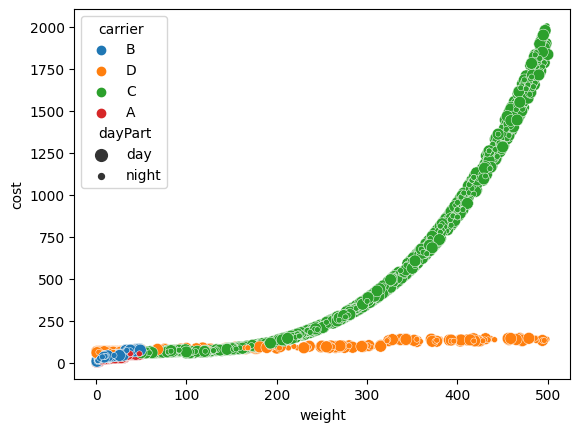

In [22]:
# sb.scatterplot(data=X,y="distance",x = y)
sb.scatterplot(x=train_x['weight'],y=train_y,hue=train_x['carrier'],size=train_x['dayPart'])

In [9]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataSelector(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.cols = columns
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self.cols]
    
selected_columns = [ 'dayPart',  'distance', 'weight','carrier']
    
    
selector = DataSelector(selected_columns)

train_x = selector.transform(Train_x)
test_x = selector.transform(Test_x)


In [10]:
train_x

,dayPart,distance,weight,carrier
2878,night,3000,470,C
22628,day,2400,21,B
348,night,1800,12,B
4847,night,2000,41,B
19735,night,2000,5,B
...,...,...,...,...
6265,day,2200,49,B
11284,night,3200,7,B
38158,night,2000,34,B
860,night,3600,245,C


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

def PrintCvScores(model,train_x,train_y,cv=5):
    scores = -np.array(cross_val_score(model,train_x,train_y,cv=cv,scoring="neg_mean_squared_error",verbose=True,n_jobs=-1))
    print(f'scores ={scores} \n\n\nAverage CV score = {scores.mean()}')
    
def DisplayRmseOnTestData(model,test_x,test_y):
    # predict test x
    y_pred = model.predict(test_x)

    # Print Results
    print(f'MSE: {mean_squared_error(y_true=test_y,y_pred=y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true=test_y,y_pred=y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true=test_y,y_pred=y_pred)}')

## Columns Catagories 

In [12]:
from sklearn.compose import make_column_selector

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='int64')

num_cols = num_cols(train_x)
cat_cols = cat_cols(train_x)

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer

# Diffierent pipes for different dataTypes
num_pipe = Pipeline([("ploy",PolynomialFeatures(degree=2)),("scaler",StandardScaler())])
cat_pipe = Pipeline([("one hot encode",OneHotEncoder())])

column_transformer = make_column_transformer((num_pipe,num_cols),(cat_pipe,cat_cols))

lr_pipe = Pipeline([("preprocess",column_transformer),("model",LinearRegression())])

lr_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('ploy',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'weight']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('one hot '
                                                                   'encode',
                                                                   OneHotEncoder())]),
                                                  ['dayPart', 'carrier'])])),
                ('model', LinearRegression())])

In [14]:
PrintCvScores(lr_pipe,train_x,train_y,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[4083.10500442 4141.68229078 3510.08541445 4444.58020036 3981.15401042] 


Average CV score = 4032.1213840859878


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


In [15]:
# fit data into model 
lr_pipe.fit(train_x,train_y)

# Display
DisplayRmseOnTestData(lr_pipe,test_x,test_y)

MSE: 3976.9059795256817
RMSE: 63.06271465395128
R2: 0.8834179955246688


## Random Forest 

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.ensemble import RandomForestRegressor

num_pipe = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaler",StandardScaler())])
cat_pipe = Pipeline([("one hot encode",OneHotEncoder())])

column_transformer = make_column_transformer((num_pipe,num_cols),(cat_pipe,cat_cols))

rfr_pipe = Pipeline([("preprocess",column_transformer),("model",RandomForestRegressor())])
rfr_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'weight']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('one hot '
                                                                   'encode',
                                                                   OneHotEncoder())]),
                                                  ['dayPart', 'carrier'])])),
                ('model', RandomForestRegressor())])

In [17]:
PrintCvScores(rfr_pipe,train_x,train_y,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[90.38763106 75.85137205 72.29679965 63.01973033 81.05861694] 


Average CV score = 76.5228300045571


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.2s finished


In [18]:
# fit data into model 
rfr_pipe.fit(train_x,train_y)

# Display
DisplayRmseOnTestData(rfr_pipe,test_x,test_y)

MSE: 73.73723969351666
RMSE: 8.58703905275367
R2: 0.9978384112543256


## XGB Regressor

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer,make_column_selector
from xgboost import XGBRegressor

num_pipe = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaler",StandardScaler())])
cat_pipe = Pipeline([("one hot encode",OneHotEncoder())])

column_transformer = make_column_transformer((num_pipe,num_cols),(cat_pipe,cat_cols))

sgb_pipe = Pipeline([("preprocess",column_transformer),("model",XGBRegressor())])
sgb_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'weight']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('one hot '
                                                                   'encode',
                                                                   OneHotEncoder())]),
                                                  ['dayPart', 'carrier'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsampl...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [20]:
PrintCvScores(sgb_pipe,train_x,train_y,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[107.27508305  87.1317774   90.88345743  63.75945429  96.25040256] 


Average CV score = 89.06003494474689


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


In [21]:
# fit data into model 
sgb_pipe.fit(train_x,train_y)

# Display
DisplayRmseOnTestData(sgb_pipe,test_x,test_y)

MSE: 90.97438711192818
RMSE: 9.538049439582927
R2: 0.997333108587423


## Neural Networks

In [91]:
from tensorflow import keras

nn_num_pipe = Pipeline([("poly",PolynomialFeatures(degree=3,include_bias=False)),("scaler",StandardScaler())])
nn_cat_pipe = Pipeline([("one hot encode",OneHotEncoder())])

nn_column_transformer = make_column_transformer((nn_num_pipe,num_cols),(nn_cat_pipe,cat_cols))

nn = keras.models.Sequential([keras.layers.Dense(15,activation='relu',input_shape=(15,)),
                             keras.layers.Dense(100,activation='relu'),
                             keras.layers.Dense(400,activation='relu'),
                             keras.layers.Dense(40,activation='relu'),
                             keras.layers.Dense(1),
                             ])

nn.compile(loss='MSE',optimizer='adam',metrics=['mse'],)
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 100)               1600      
                                                                 
 dense_2 (Dense)             (None, 400)               40400     
                                                                 
 dense_3 (Dense)             (None, 40)                16040     
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 58,321
Trainable params: 58,321
Non-trainable params: 0
_________________________________________________________________


In [92]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
hist = nn.fit(nn_column_transformer.fit_transform(train_x),train_y,epochs=200,callbacks=[early_stopping],validation_split=.15)

Epoch 1/200
829/829 [==============================] - 4s 5ms/step - loss: 5239.1611 - mse: 5239.1611 - val_loss: 2028.4716 - val_mse: 2028.4716
Epoch 2/200
829/829 [==============================] - 3s 4ms/step - loss: 1516.9178 - mse: 1516.9178 - val_loss: 681.3085 - val_mse: 681.3085
Epoch 3/200
829/829 [==============================] - 4s 4ms/step - loss: 522.6730 - mse: 522.6730 - val_loss: 342.4248 - val_mse: 342.4248
Epoch 4/200
829/829 [==============================] - 3s 4ms/step - loss: 229.4618 - mse: 229.4618 - val_loss: 121.3026 - val_mse: 121.3026
Epoch 5/200
829/829 [==============================] - 3s 3ms/step - loss: 175.2500 - mse: 175.2500 - val_loss: 100.6012 - val_mse: 100.6012
Epoch 6/200
829/829 [==============================] - 3s 3ms/step - loss: 224.2170 - mse: 224.2170 - val_loss: 620.6082 - val_mse: 620.6082
Epoch 7/200
829/829 [==============================] - 4s 4ms/step - loss: 199.5046 - mse: 199.5046 - val_loss: 261.8926 - val_mse: 261.8926
Epoch 8

<AxesSubplot: >

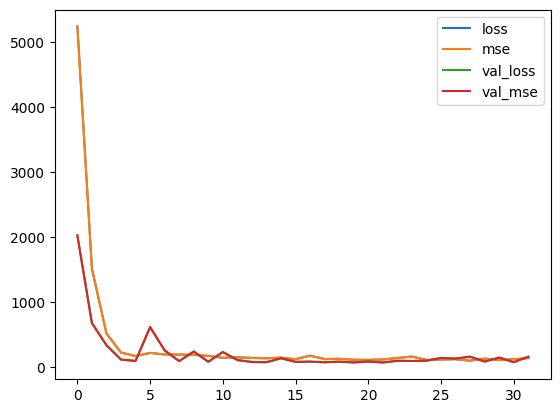

In [93]:
pd.DataFrame(hist.history).plot()

In [94]:
# Display
DisplayRmseOnTestData(nn,nn_column_transformer.transform(test_x),test_y)

244/244 [==============================] - 1s 2ms/step
MSE: 81.51392514168236
RMSE: 9.028506251960087
R2: 0.9977481003096748


In [39]:
def saveForSumbission(model,file_name,selected_cols,isNN=False):
    comp_test = pd.read_csv("./Datasets/logistic/test.csv")
    
    # Preprocess
    ids = comp_test['trip']
    data_selector = DataSelector(selected_cols)
    c_test_x = data_selector.transform(comp_test)
    y_pred = model.predict(c_test_x)
    
    comp = ""
    
    if isNN:
        comp_y = pd.DataFrame(zip(ids,[i[0] for i in y_pred]),columns=["trip","cost"])
    else:
        comp_y = pd.DataFrame(zip(ids,y_pred),columns=["trip","cost"])
        
    comp_y.to_csv(f'{file_name.replace(" ","")}.csv',index=False)
    
    return comp_y

In [22]:
class DatePreprocess(BaseEstimator,TransformerMixin):
    def __init__(self,date_column_name,is_date=True,is_month=True,is_year=True,is_day=True,in_place=True):
        self.is_date = is_date
        self.is_month = is_month        
        self.is_year = is_year        
        self.is_day = is_day 
        self.date_column_name = date_column_name
        self.in_place = in_place
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        dates = pd.to_datetime(X[self.date_column_name])
        self.transform_X = X.copy()
        
        
        if(self.is_year):
            self.transform_X['year'] = dates.dt.year
        
        if(self.is_month):
            self.transform_X['month'] = dates.dt.month
        
        if(self.is_date):
            self.transform_X['date_0'] = dates.dt.date
            
        if(self.is_day):
            self.transform_X['week_day'] = dates.dt.weekday
            
        if(self.in_place):
            self.transform_X = self.transform_X.drop(self.date_column_name,axis=1)
            
        
        # Encode features using one-hot encoding
        self.transform_X = pd.get_dummies(self.transform_X, columns=self.get_append_column_names())
            
        return self.transform_X
    
    def fit_transform(self,X,y=None):
        return self.transform(X)
    
    def get_append_column_names(self):
        cols = []
        if(self.is_year):
            cols.append('year')
        
        if(self.is_month):
            cols.append('month')
        
        if(self.is_date):
            cols.append('date_0')
            
        if(self.is_day):
            cols.append('week_day')
            
        return cols
    
        

In [24]:
selected_columns_with_date = ['date', 'dayPart', 'distance','originLocation',"destinationLocation",  'weight', 'carrier']

data_selector = DataSelector(selected_columns_with_date)

train_x = data_selector.transform(Train_x)
test_x = data_selector.transform(Test_x)

### Column Transform pipeline (Inner Pipeline)

In [42]:
date_preprocess = DatePreprocess('date',is_date=False)
cat_new_cols = cat_cols+['originLocation',"destinationLocation"]

cat_date_col_pipe = Pipeline([("oneHotEncode",OneHotEncoder())])
num_pipe_with_poly = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaling",StandardScaler())])

transform_pipe = make_column_transformer((cat_date_col_pipe,cat_new_cols),(num_pipe_with_poly,num_cols))
transform_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('oneHotEncode',
                                                  OneHotEncoder())]),
                                 ['dayPart', 'carrier', 'originLocation',
                                  'destinationLocation']),
                                ('pipeline-2',
                                 Pipeline(steps=[('poly',
                                                  PolynomialFeatures(degree=3)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['distance', 'weight'])])

### Outer pipeline

In [26]:
rfr_date_pipe = Pipeline([("preprocess",transform_pipe),("model",RandomForestRegressor())])
rfr_date_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('oneHotEncode',
                                                                   OneHotEncoder())]),
                                                  ['dayPart', 'carrier',
                                                   'originLocation',
                                                   'destinationLocation']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['distance', 'weight'])])),
                ('model', RandomForestRegressor())])

In [27]:
PrintCvScores(rfr_date_pipe,date_preprocess.transform(train_x),train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[81.89083675 73.20389564 69.02613088 60.54076212 82.46063203] 


Average CV score = 73.42445148536667


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s finished


### Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__n_jobs":[-1],
    "model__criterion": ['squared_error','friedman_mse', 'poisson'],
    "model__n_estimators": [90,100,150],
    "model__min_samples_split":[2,3,4],
    "model__min_samples_leaf":[1,2],
}

grid_search = GridSearchCV(rfr_date_pipe,params,cv=3,verbose=True,n_jobs=-1)
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('oneHotEncode',
                                                                                          OneHotEncoder())]),
                                                                         ['dayPart',
                                                                          'carrier',
                                                                          'originLocation',
                                                                          'destinationLocation']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(degree=3)),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['distance',
                                                                          'weight'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'poisson'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 3, 4],
                         'model__n_estimators': [90, 100, 150],
                         'model__n_jobs': [-1]},
             verbose=True)

In [32]:
PrintCvScores(grid_search.best_estimator_,date_preprocess.transform(train_x),train_y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[81.1881389  69.16644265 64.14695998 57.16363152 79.54766731] 


Average CV score = 70.24256807220004


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.3s finished


In [40]:
saveForSumbission(grid_search.best_estimator_,"rfr_best_estimator",selected_columns_with_date)

,trip,cost
0,t333282728025,61.253110
1,t35583500660,30.314907
2,t117664376784,63.397500
3,t261320757828,71.135004
4,t147086054909,33.336863
...,...,...
797,t353400176448,1741.690284
798,t112945848426,38.795276
799,t53097944970,35.064767
800,t127986960246,62.486500


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_pipe = Pipeline([("preprocess",transform_pipe),("model",DecisionTreeRegressor())])
decision_tree_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('oneHotEncode',
                                                                   OneHotEncoder())]),
                                                  ['dayPart', 'carrier',
                                                   'originLocation',
                                                   'destinationLocation']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['distance', 'weight'])])),
                ('model', DecisionTreeRegressor())])

In [55]:
PrintCvScores(decision_tree_pipe,date_preprocess.transform(train_x),train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[137.0656744  118.69442621 119.36082027 108.81075012 124.85930625] 


Average CV score = 121.75819545011215


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [56]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__criterion": ['squared_error','friedman_mse', 'poisson'],
    "model__min_samples_split": [1,2,3],
    "model__max_features":["auto", "sqrt", "log2"],
}

grid_search = GridSearchCV(decision_tree_pipe,params,cv=3,verbose=True,n_jobs=-1)
grid_search.fit(date_preprocess.transform(train_x),train_y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\jeetc\miniconda3\envs\aml1114\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('oneHotEncode',
                                                                                          OneHotEncoder())]),
                                                                         ['dayPart',
                                                                          'carrier',
                                                                          'originLocation',
                                                                          'destinationLocation']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(degree=3)),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['distance',
                                                                          'weight'])])),
                                       ('model', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'poisson'],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_split': [1, 2, 3]},
             verbose=True)

In [57]:
PrintCvScores(grid_search.best_estimator_,date_preprocess.transform(train_x),train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


scores =[138.30379523 115.46994812 112.53761938 115.27502693 125.78965891] 


Average CV score = 121.47520971412271


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
